In [518]:
import cv2
import numpy as np

In [519]:
from matplotlib import pyplot as plt

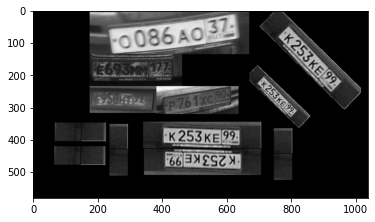

In [520]:
img = cv2.imread('numbers.png', cv2.IMREAD_GRAYSCALE)

# numbers.png
# numbers_4.jpg
# numbers_5.jpg
# numbers_10.jpg
# numbers_11.jpg
# numbers_13.jpg

plt.imshow(img, cmap='gray')

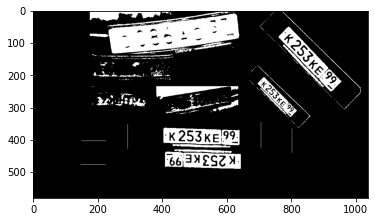

In [521]:
binarised = cv2.threshold(img, 100.0, 255.0, cv2.THRESH_BINARY)[1]
plt.imshow(binarised, cmap='gray')

In [522]:
kernel_2 = cv2.getStructuringElement(cv2.MORPH_ELLIPSE,(2,2))
kernel_5 = cv2.getStructuringElement(cv2.MORPH_ELLIPSE,(5,5))
kernel_10 = cv2.getStructuringElement(cv2.MORPH_ELLIPSE,(10,10))
kernel_20 = cv2.getStructuringElement(cv2.MORPH_ELLIPSE,(20,20))

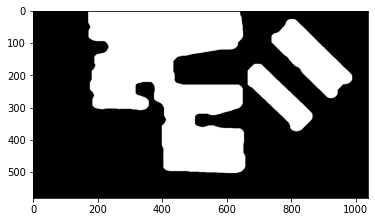

In [523]:
img_mask = img.copy()
img_mask = cv2.dilate(img_mask, kernel_20, iterations=3)
img_mask = cv2.erode(img_mask, kernel_20, iterations=2)
img_mask = cv2.threshold(img_mask, 100.0, 255.0, cv2.THRESH_BINARY)[1]

img_mask = cv2.erode(img_mask, kernel_20, iterations=2)
img_mask = cv2.dilate(img_mask, kernel_20, iterations=2)


plt.imshow(img_mask, cmap='gray')

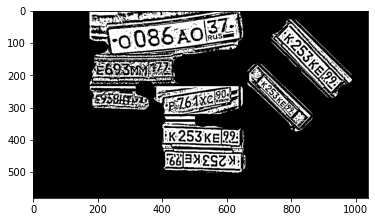

In [524]:
img_adapt_thr = cv2.adaptiveThreshold(img, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY, 21, 2)
img3 = (img_mask & img_adapt_thr)
plt.imshow(img3, cmap='gray')

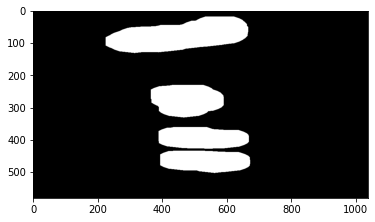

In [525]:
kernel_20_10 = cv2.getStructuringElement(cv2.MORPH_ELLIPSE,(20,10))
kernel_50_10 = cv2.getStructuringElement(cv2.MORPH_ELLIPSE,(50, 10))
kernel_30_10 = cv2.getStructuringElement(cv2.MORPH_ELLIPSE,(30, 10))
kernel_10_20 = cv2.getStructuringElement(cv2.MORPH_ELLIPSE,(10,20))
kernel_2_4 = cv2.getStructuringElement(cv2.MORPH_ELLIPSE,(2,4))
kernel_4_2 = cv2.getStructuringElement(cv2.MORPH_ELLIPSE,(4,2))

img2 = img3.copy()

img2 = cv2.erode(img2, kernel_2, iterations=2)
img2 = cv2.dilate(img2, kernel_2, iterations=2)
img2 = ~cv2.floodFill(img2.copy(), np.zeros((img2.shape[0] + 2, img2.shape[1] + 2), np.uint8), (0, 0), 255.0)[1]
img2 = cv2.dilate(img2, kernel_10, iterations=3)
img2 = cv2.erode(img2, kernel_50_10, iterations=2)
img2 = cv2.erode(img2, kernel_5, iterations=5)
img2 = cv2.dilate(img2, kernel_30_10, iterations=5)

big_4_mask = img2

plt.imshow(big_4_mask, cmap='gray')



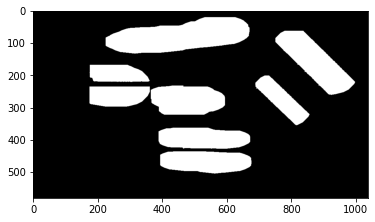

In [526]:
kernel_cross = ~cv2.getStructuringElement(cv2.MORPH_CROSS, (10,10))

bigger_4_mask = cv2.dilate(big_4_mask, kernel_10, iterations=5)

img5 = img_mask & ~bigger_4_mask

img5 = cv2.erode(img5, kernel_10_20, iterations=4)
img5 = cv2.dilate(img5, kernel_20_10, iterations=4)
img5 = cv2.erode(img5, kernel_10_20, iterations=4)
img5 = cv2.dilate(img5, kernel_20_10, iterations=4)
img5 = cv2.erode(img5, kernel_10_20, iterations=4)
img5 = cv2.dilate(img5, kernel_20, iterations=6)

almost_all = (img5 | big_4_mask) & img

almost_all = cv2.threshold(almost_all, 20.0, 255.0, cv2.THRESH_BINARY)[1]
almost_all = cv2.dilate(almost_all, kernel_4_2, iterations=2)
almost_all = cv2.erode(almost_all, kernel_2, iterations=2)

plt.imshow(almost_all, cmap='gray')

4


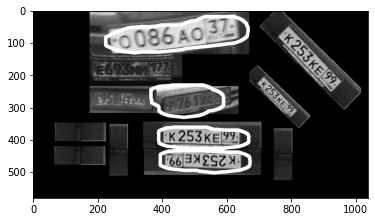

In [527]:
result = big_4_mask # almost_all

contours, _ = cv2.findContours(result, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
numbers = len(contours)
print(numbers)

contours_drawn = cv2.drawContours(img.copy(), contours, -1, (255,255,0), 10)
plt.imshow(contours_drawn, cmap='gray')

8


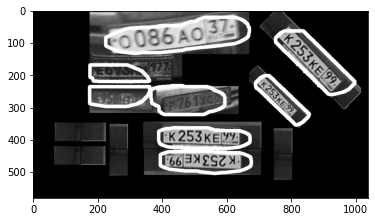

In [528]:
result = almost_all

contours, _ = cv2.findContours(result, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
numbers = len(contours)
print(numbers)

contours_drawn = cv2.drawContours(img, contours, -1, (255,255,0), 10)
plt.imshow(contours_drawn, cmap='gray')